In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)
!date

Tue Sep 15 17:01:09 CEST 2015


In [44]:
'''
somehow we need to get RNA data...
'''
from eden.converter.fasta import fasta_to_sequence
from eden.converter.rna.rnafold import rnafold_to_eden



def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

def rfam_uri(family_id):
    return '%s.fa'%(family_id)

def get_graphs(rfam_id = 'RF00008'):
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    graphs = rnafold_to_eden(seqs, shape_type=5, energy_range=30, max_num=3)
    return graphs


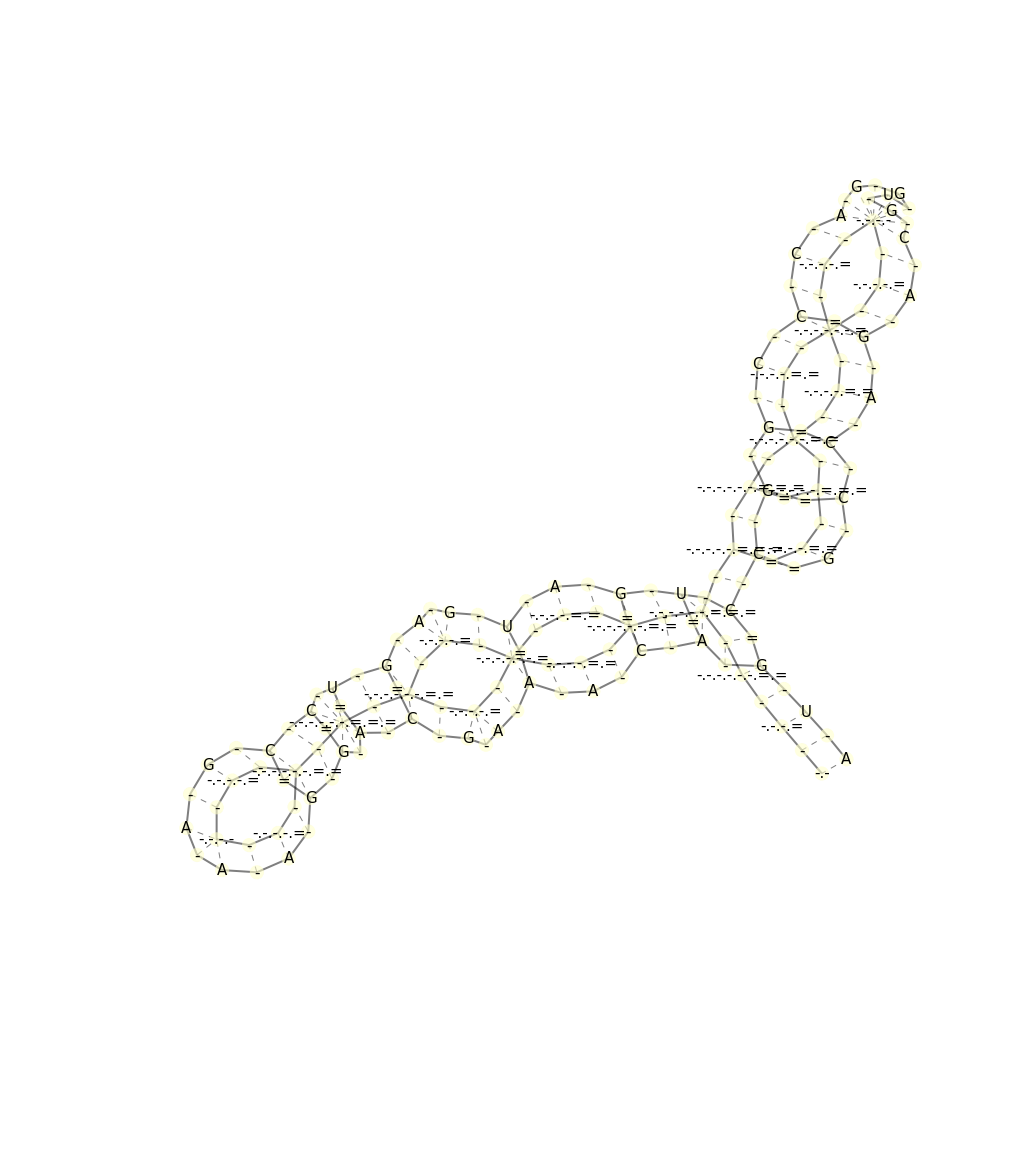

In [45]:
'''
first we test the core/interface extractor AKA graphmanager oO
'''
%matplotlib inline
import graphlearn.abstract_graphs.ubergraphlearn as ul
from graphlearn.utils import draw
graphs=get_graphs()
graph=graphs.next()

gman = ul.UberGraphManager(graph, base_thickness_list=[2])
cips=gman.all_cips(thickness_list=[2],radius_list=[0,1],hash_bitmask=2**20-1)
draw.graphlearn(gman.graph(nested=True), size=20)



In [46]:
%%time
'''
second is reading a grammar and training an estimator
'''
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.abstract_graphs.ubergraphlearn as ul
import graphlearn.abstract_graphs.rna_my_abstract as rna
import itertools

# learn a grammar
graphs = get_graphs()
graphs = itertools.islice(graphs,100)

sampler=ul.UberSampler(radius_list=[0,1],
                       thickness_list=[1], 
                       min_cip_count=1,
                       min_interface_count=3,
                       #postprocessor=rna.PostProcessor()
                      )

sampler.fit(graphs,n_jobs=4,batch_size=3)

sampler.save('tmp/rna_ubergrammar.ge')

fitting was asked with n=1

Classifier:
SGDClassifier(alpha=0.000866875539764, average=False, class_weight=None,
       epsilon=0.1, eta0=0.20726382474, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=33, n_jobs=1,
       penalty='elasticnet', power_t=1.06996697238, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#instances: 82  #interfaces: 90   #cores: 352   #core-interface-pairs: 532
Saved model: tmp/rna_ubergrammar.ge
CPU times: user 14.3 s, sys: 4.92 s, total: 19.2 s
Wall time: 40.8 s


interface id: 569139 [27 options]


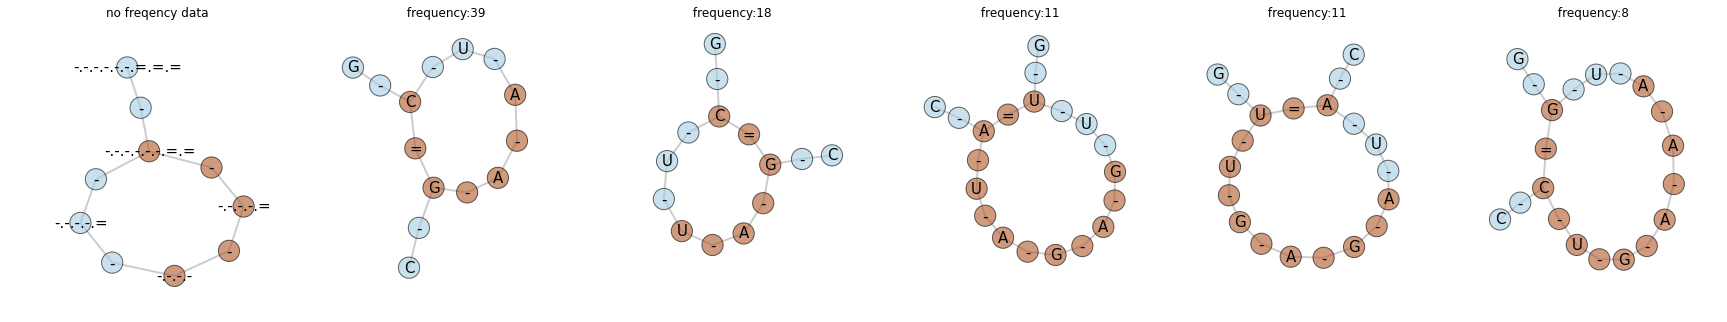

interface id: 615638 [20 options]


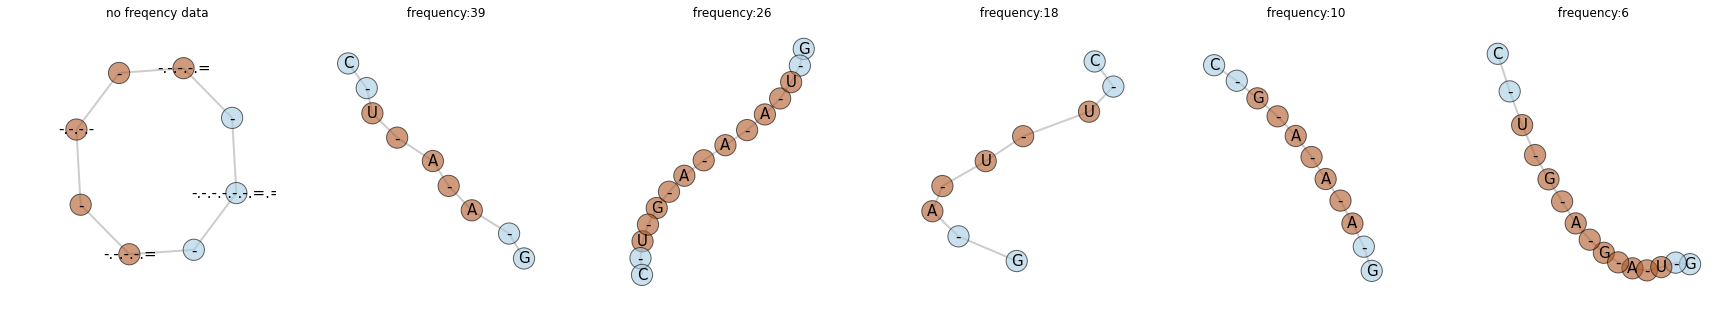

interface id: 92935 [19 options]


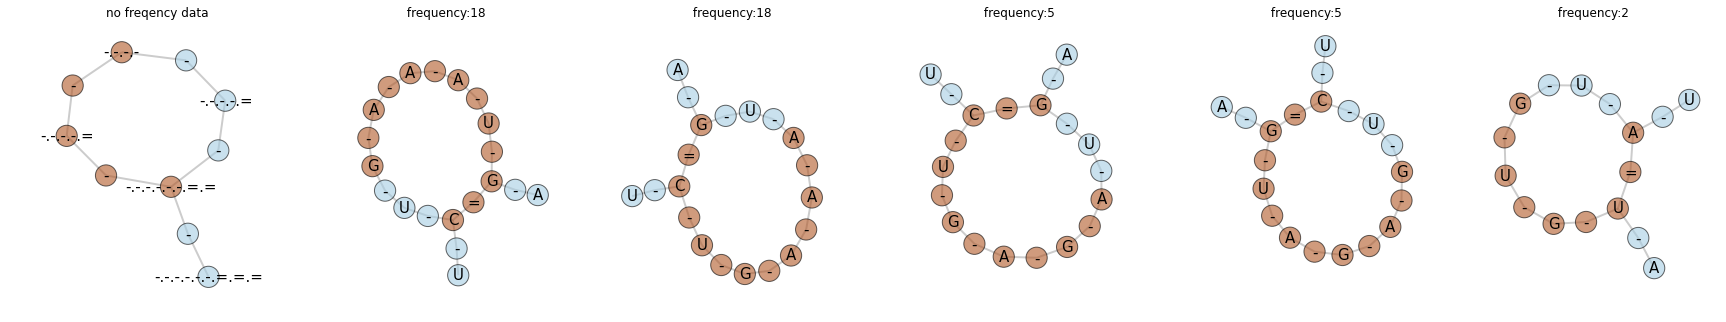

interface id: 603696 [17 options]


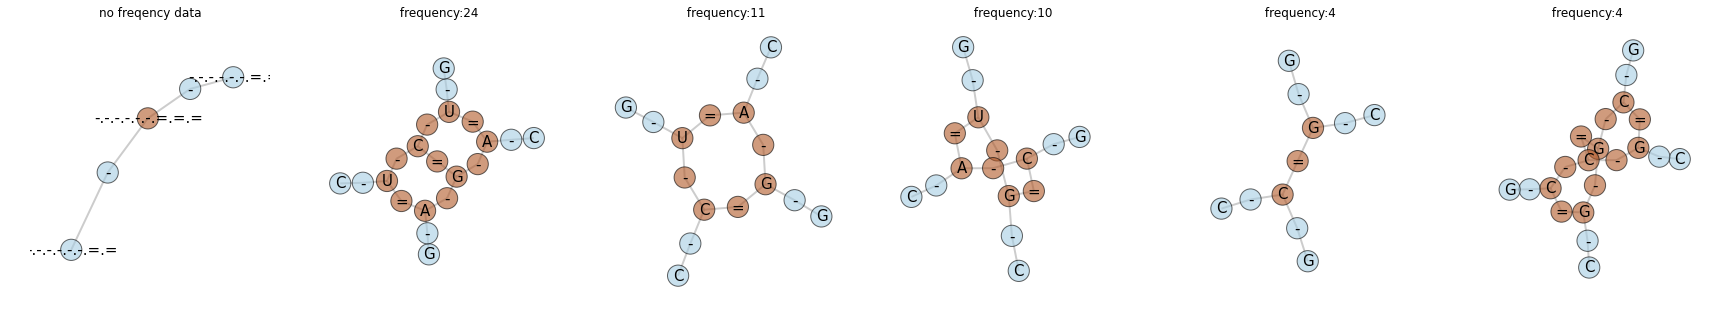

interface id: 697731 [16 options]


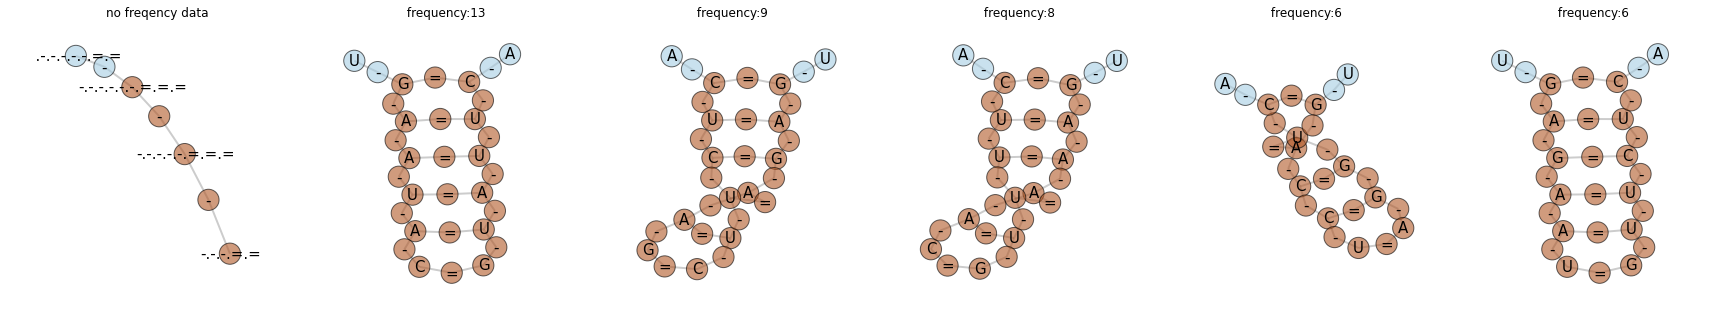

In [47]:
#draw production rules
myutils.draw_grammar(sampler.lsgg.productions,n_productions=5,n_graphs_per_production=6,
                     n_graphs_per_line=6, size=5, 
                     colormap='Paired', invert_colormap=False,node_border=1,abstract_interface=True,
                     vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

In [48]:
#grammar statistics
#myutils.draw_grammar_stats(sampler.lsgg.productions, size=(10,5))

Loaded model: tmp/rna_ubergrammar.ge
preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
batch_size: 1
    burnin: 0
estimatorobject: <graphlearn.estimatorwrapper.EstimatorWrapper instance at 0x7fa108ac3f38>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7fa108ac3b90>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 0
improving_penalty_per_step: -1.0
improving_threshold: -1
keep_duplicates: False
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7fa10b90fc50>
max_core_size_diff: -2
    n_jobs: 1
   n_steps: 10
      nbit: 20
node_entity_check: <function <lambda> at 0x7fa109dd1b18>
 omit_seed: True
postprocessor: <graphlearn.postprocessing.PostProcessor instance at 0x7fa11966e248>
probabilistic_core_choice: False
proposal_probability: False
quick_skip_orig_cip: False
radius_list: [0, 2]
random_state: None
sample_path: None
sampling_interval: 3
score_core_choice: False
selec

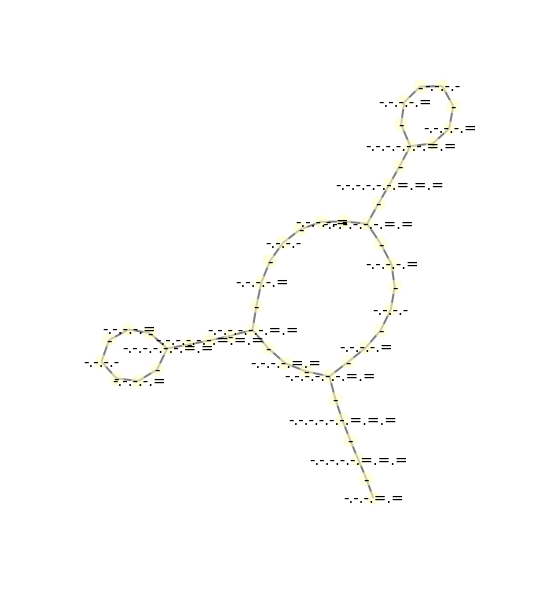

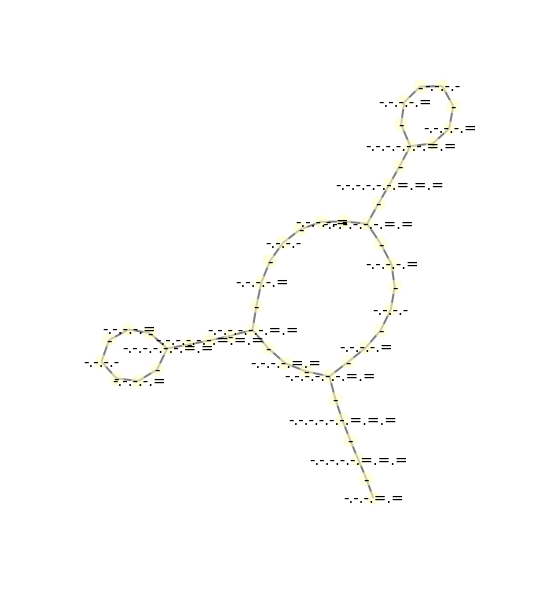

_score:0.924913367507
_abstract_graph:
some_thickness_list:[2]
_base_graph:
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
119
48
_propose_graph: iteration 0 ; core 0 of 6 ; original_cips tried  0


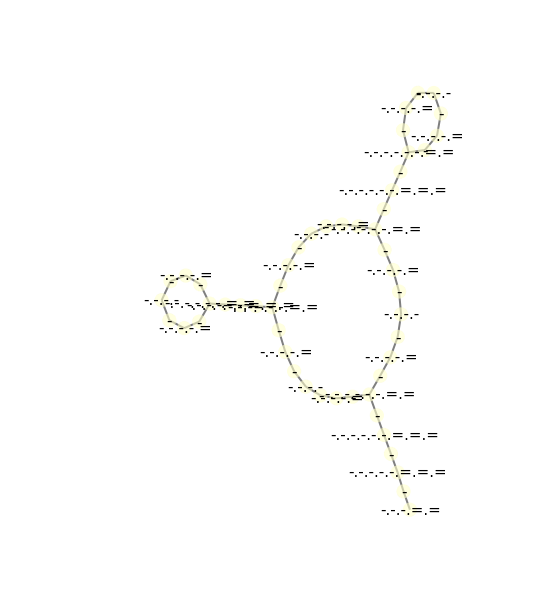

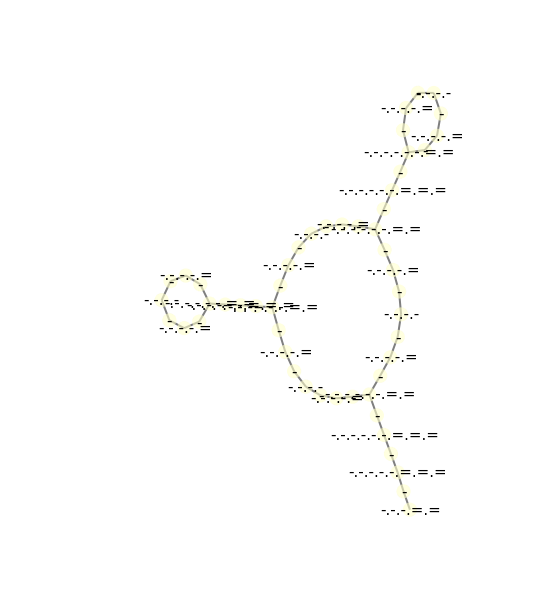

_score:0.558139201581
_abstract_graph:
some_thickness_list:[2]
_base_graph:(())_with_int_labels
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
133
52
select_cip_for_substitution failed because no suiting interface was found,             extract failed 10 times; cip found but unacceptable:10 
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 354, in _sample
    candidate_graph_manager = self._propose(graph_manager)
  File "graphlearn/graphlearn.py", line 518, in _propose
    graph = self._propose_graph(graphman)
  File "graphlearn/graphlearn.py", line 535, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(self.select_original_cip(graphman)):
  File "graphlearn/graphlearn.py", line 706, in select_original_cip
    extract failed %d times; 

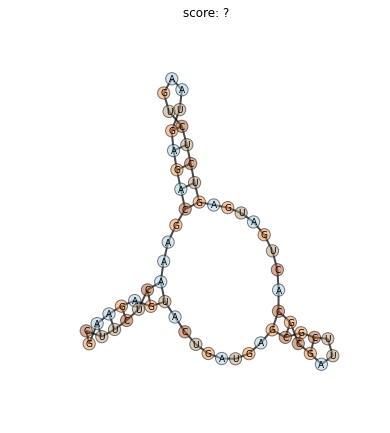

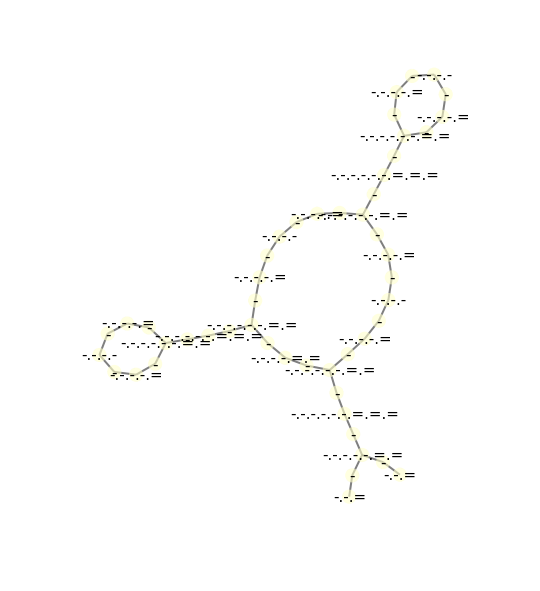

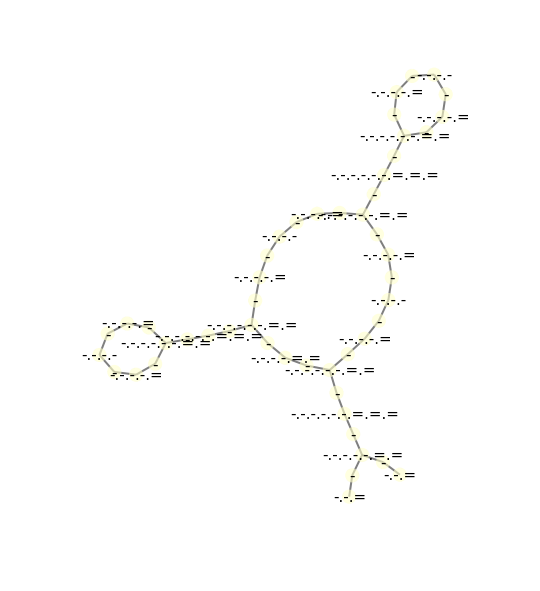

_score:0.880949692957
_abstract_graph:
some_thickness_list:[2]
_base_graph:
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
120
50
_propose_graph: iteration 0 ; core 0 of 4 ; original_cips tried  0


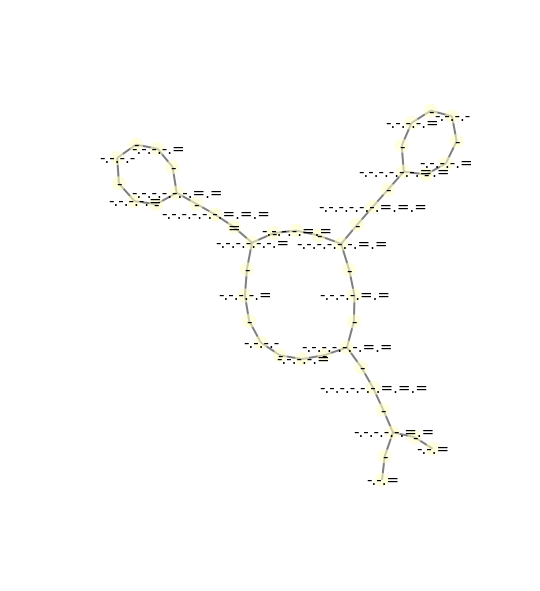

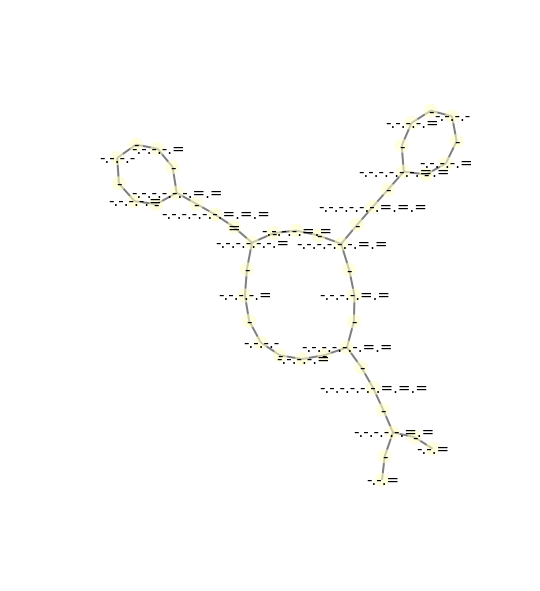

_score:0.387980031959
_abstract_graph:
some_thickness_list:[2]
_base_graph:(())_with_int_labels
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
106
46
select_cip_for_substitution failed because no suiting interface was found,             extract failed 10 times; cip found but unacceptable:10 
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 354, in _sample
    candidate_graph_manager = self._propose(graph_manager)
  File "graphlearn/graphlearn.py", line 518, in _propose
    graph = self._propose_graph(graphman)
  File "graphlearn/graphlearn.py", line 535, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(self.select_original_cip(graphman)):
  File "graphlearn/graphlearn.py", line 706, in select_original_cip
    extract failed %d times; 

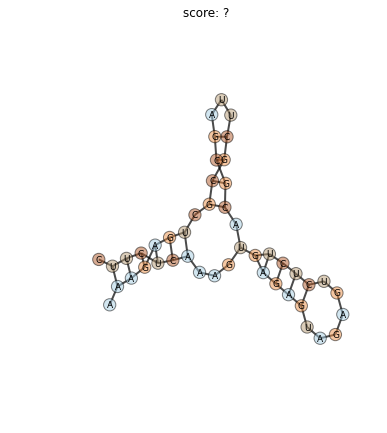

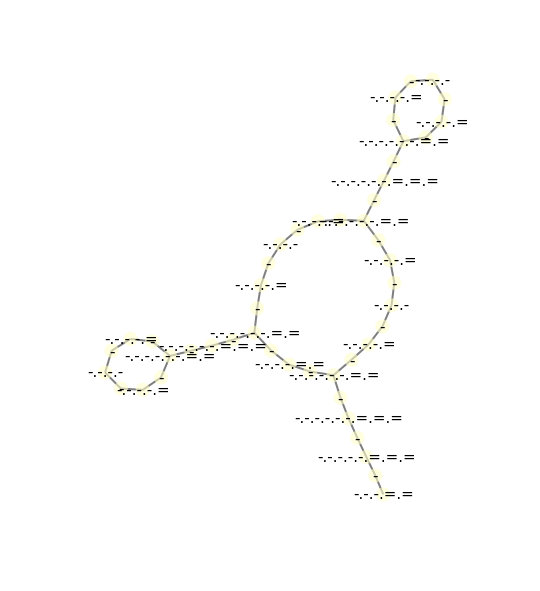

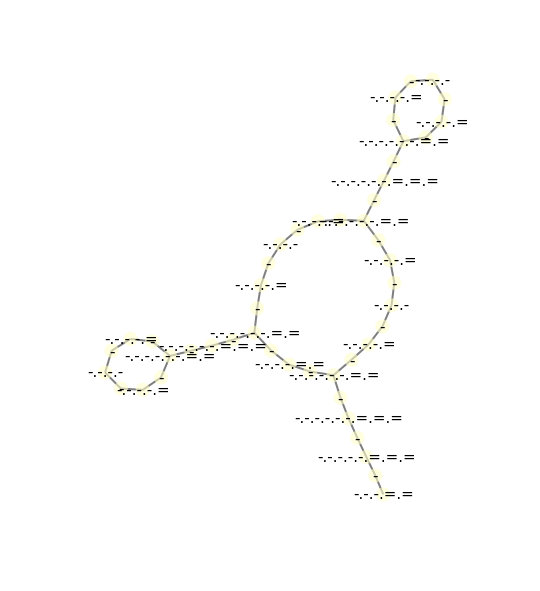

_score:0.895155531204
_abstract_graph:
some_thickness_list:[2]
_base_graph:
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
124
48
_propose_graph: iteration 0 ; core 0 of 19 ; original_cips tried  0


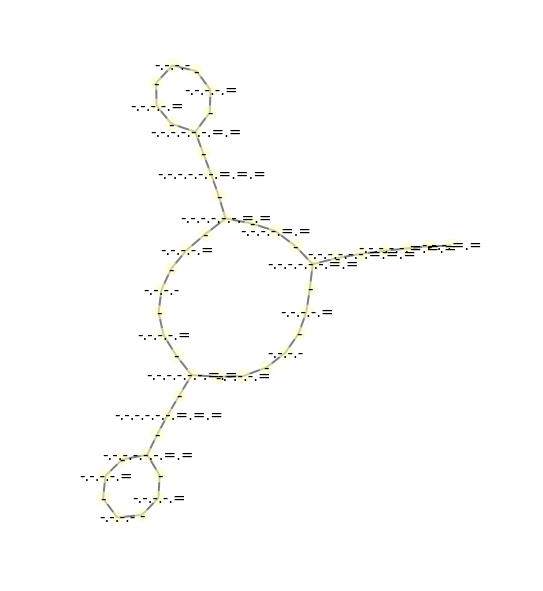

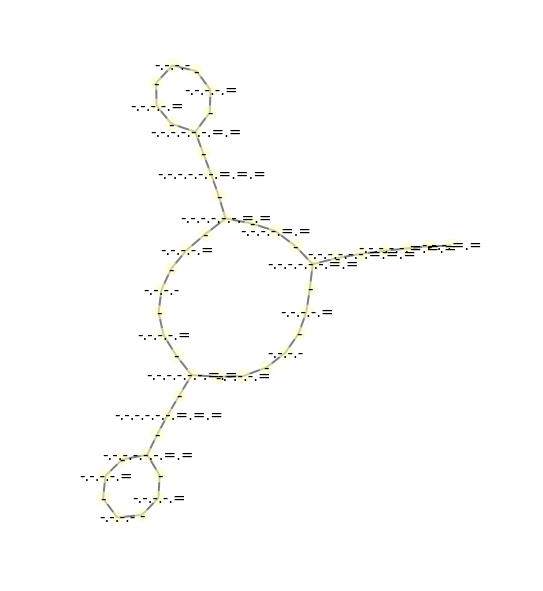

_score:0.876967573066
_abstract_graph:
some_thickness_list:[2]
_base_graph:(())_with_int_labels
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
126
48
select_cip_for_substitution failed because no suiting interface was found,             extract failed 10 times; cip found but unacceptable:10 
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 354, in _sample
    candidate_graph_manager = self._propose(graph_manager)
  File "graphlearn/graphlearn.py", line 518, in _propose
    graph = self._propose_graph(graphman)
  File "graphlearn/graphlearn.py", line 535, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(self.select_original_cip(graphman)):
  File "graphlearn/graphlearn.py", line 706, in select_original_cip
    extract failed %d times; 

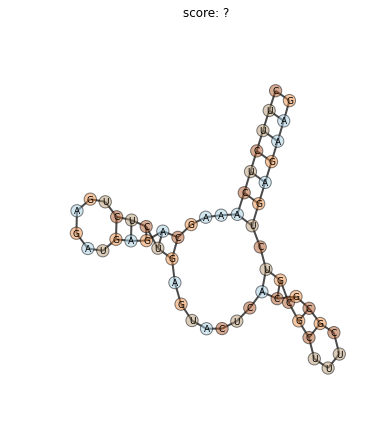

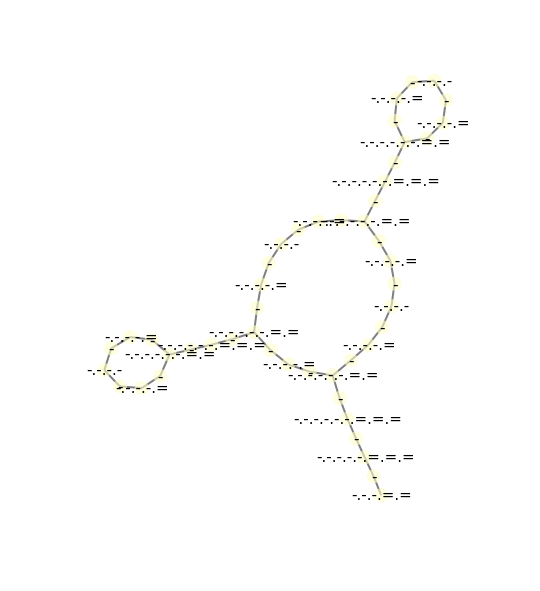

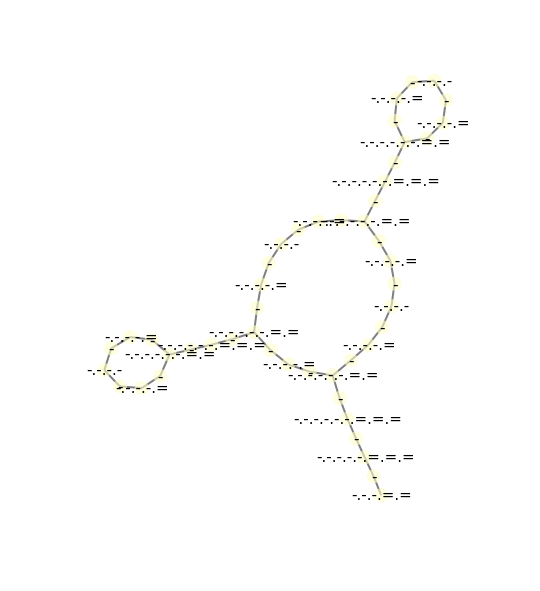

_score:0.458882335039
_abstract_graph:
some_thickness_list:[2]
_base_graph:
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
126
48
_propose_graph: iteration 0 ; core 0 of 18 ; original_cips tried  0


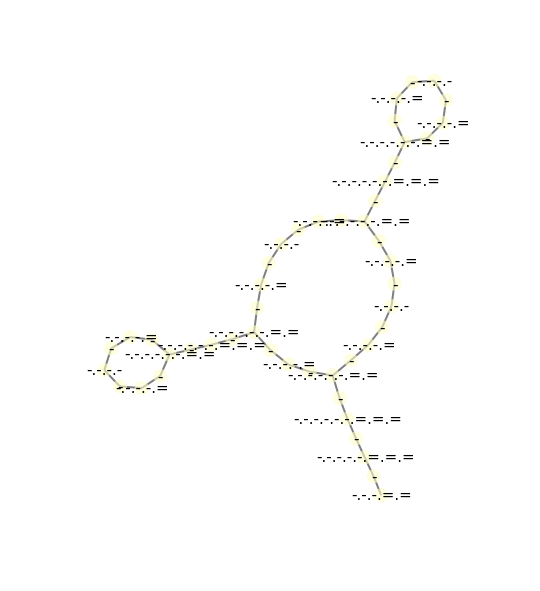

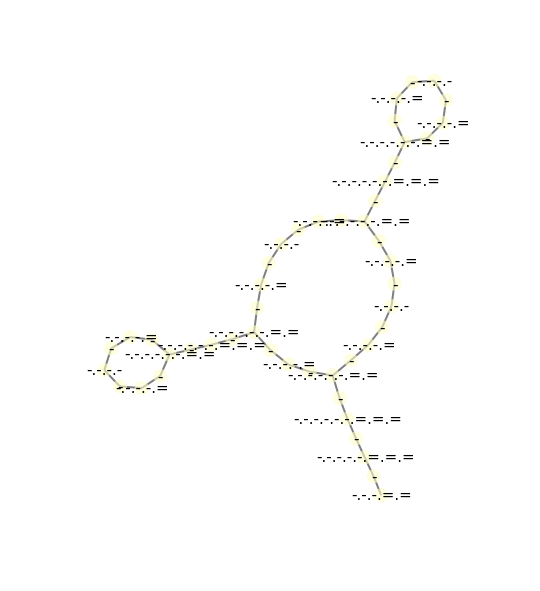

_score:0.458882335039
_abstract_graph:
some_thickness_list:[2]
_base_graph:
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
126
48
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0


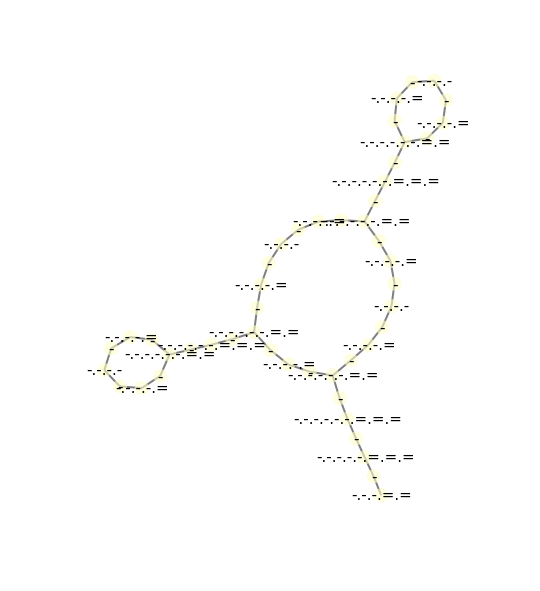

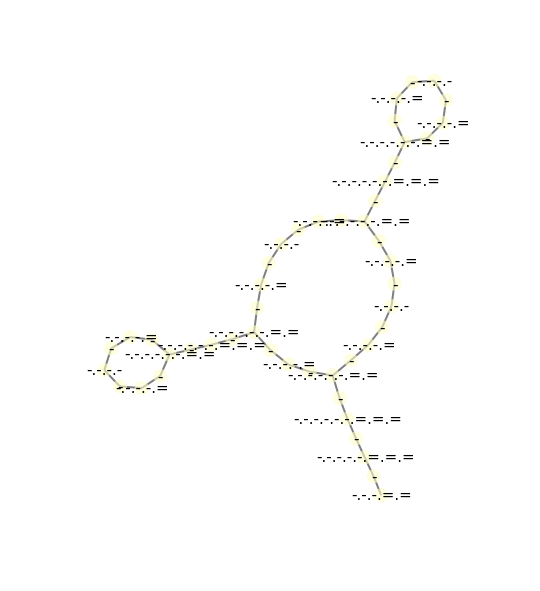

_score:0.458882335039
_abstract_graph:
some_thickness_list:[2]
_base_graph:
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
126
48
_propose_graph: iteration 2 ; core 0 of 6 ; original_cips tried  0


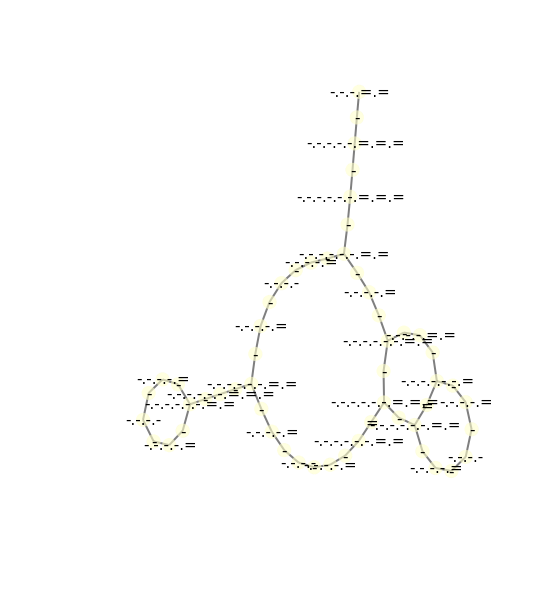

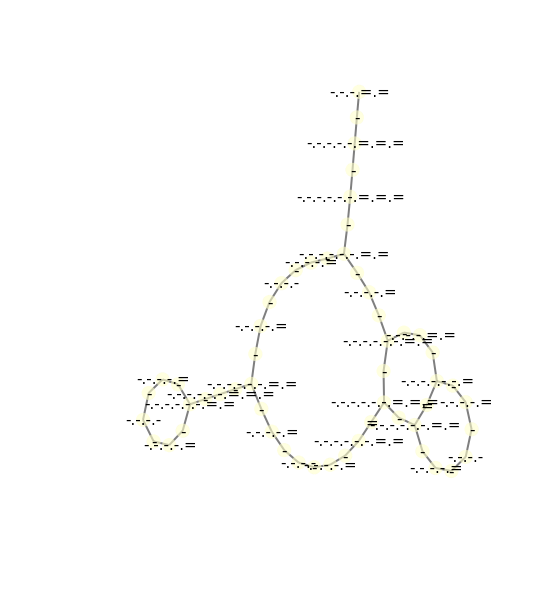

_score:0.425696877863
_abstract_graph:
some_thickness_list:[2]
_base_graph:(())_with_int_labels
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
131
55
select_cip_for_substitution failed because no suiting interface was found,             extract failed 10 times; cip found but unacceptable:10 
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 354, in _sample
    candidate_graph_manager = self._propose(graph_manager)
  File "graphlearn/graphlearn.py", line 518, in _propose
    graph = self._propose_graph(graphman)
  File "graphlearn/graphlearn.py", line 535, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(self.select_original_cip(graphman)):
  File "graphlearn/graphlearn.py", line 706, in select_original_cip
    extract failed %d times; 

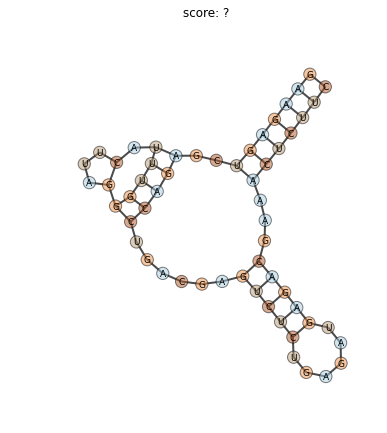

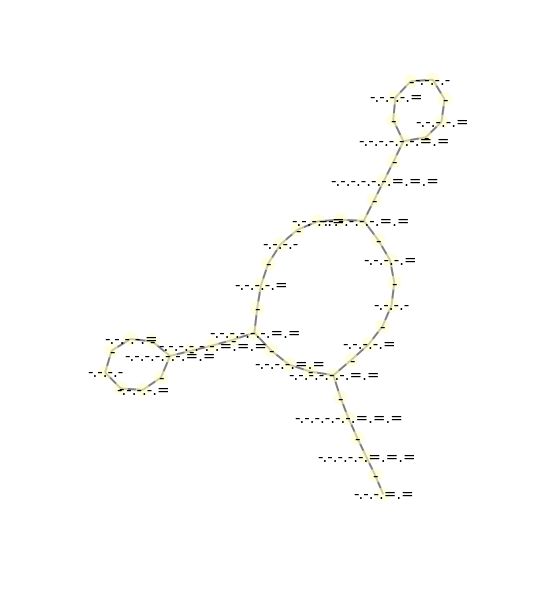

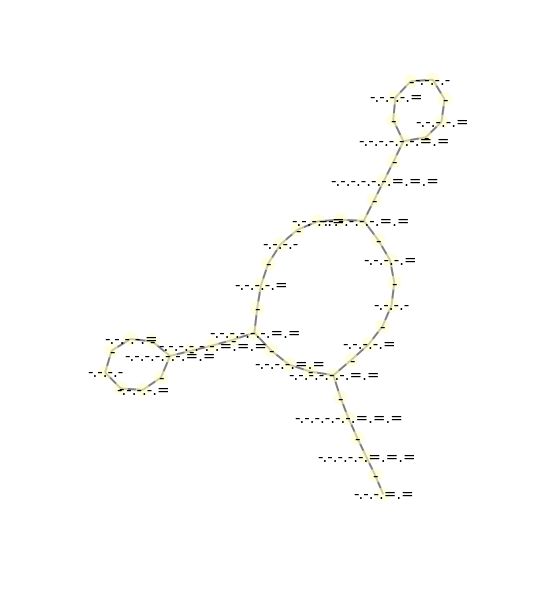

_score:0.818533392492
_abstract_graph:
some_thickness_list:[2]
_base_graph:
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
121
48
_propose_graph: iteration 0 ; core 0 of 3 ; original_cips tried  0


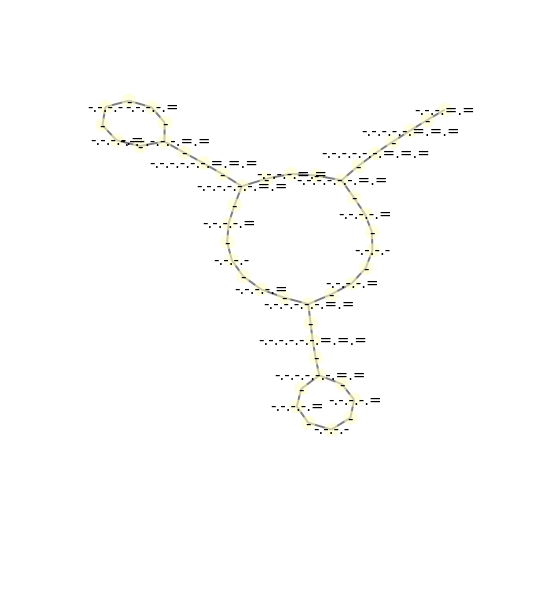

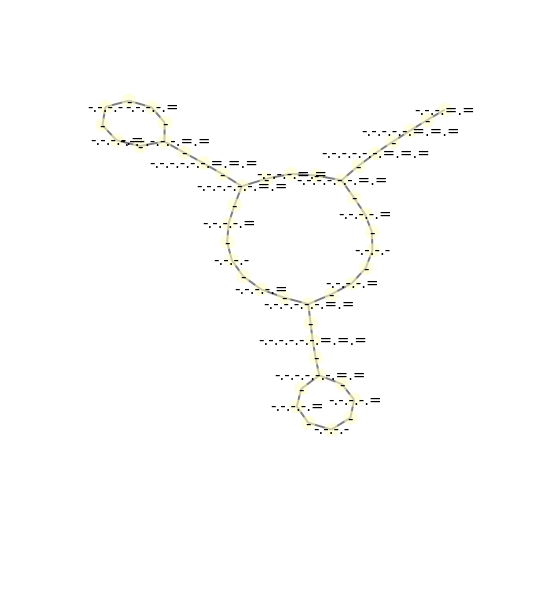

_score:0.680561540403
_abstract_graph:
some_thickness_list:[2]
_base_graph:(())_with_int_labels
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
121
48
select_cip_for_substitution failed because no suiting interface was found,             extract failed 9 times; cip found but unacceptable:9 
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 354, in _sample
    candidate_graph_manager = self._propose(graph_manager)
  File "graphlearn/graphlearn.py", line 518, in _propose
    graph = self._propose_graph(graphman)
  File "graphlearn/graphlearn.py", line 535, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(self.select_original_cip(graphman)):
  File "graphlearn/graphlearn.py", line 706, in select_original_cip
    extract failed %d times; ci

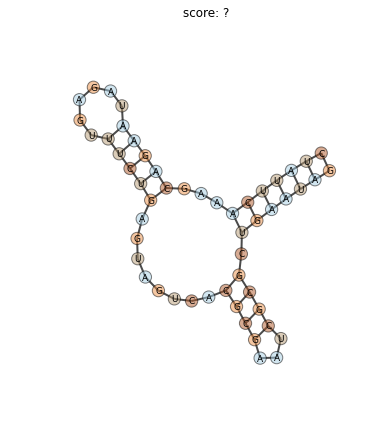

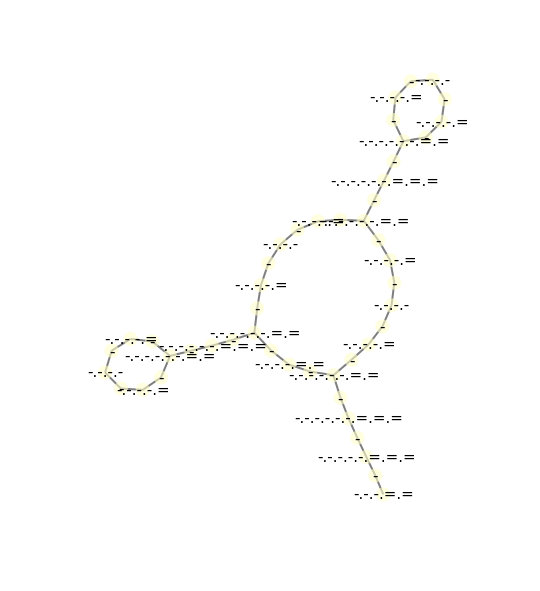

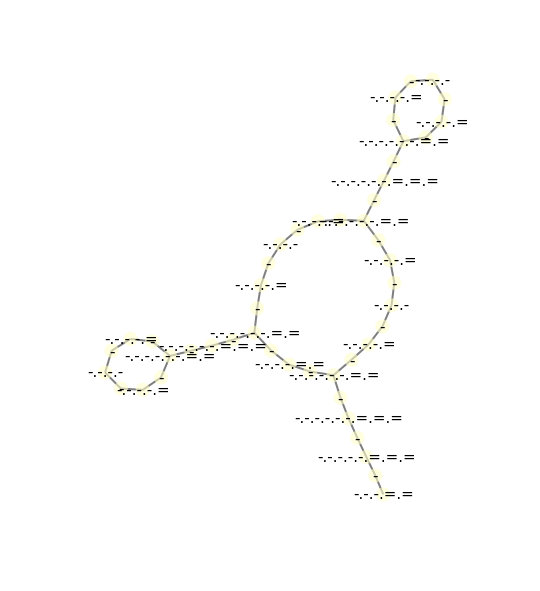

_score:0.819688940441
_abstract_graph:
some_thickness_list:[2]
_base_graph:
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
124
48
_propose_graph: iteration 0 ; core 0 of 6 ; original_cips tried  0


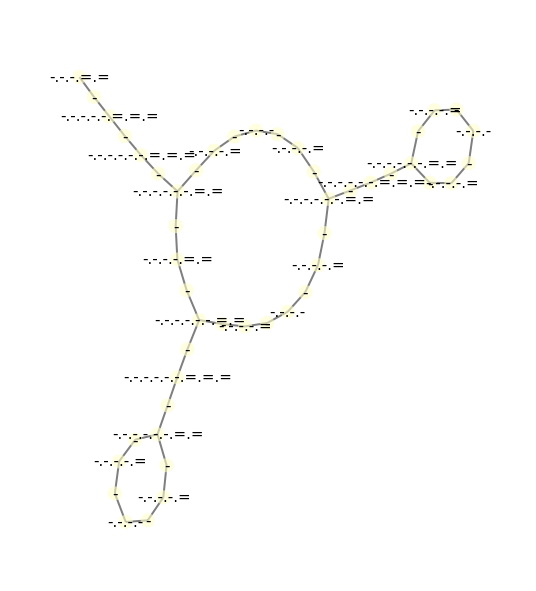

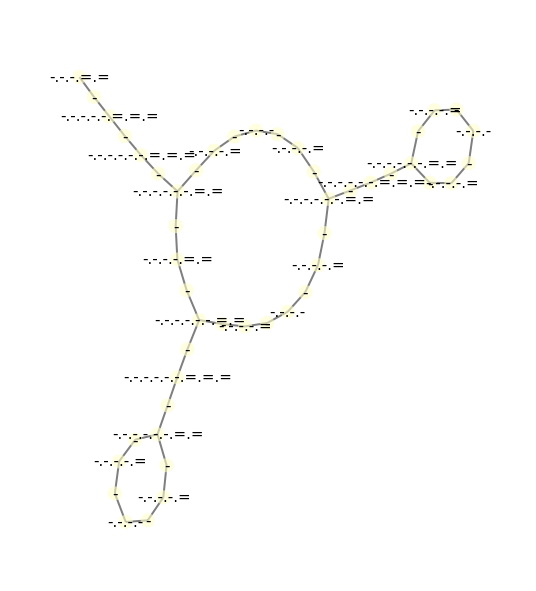

_score:0.753447591341
_abstract_graph:
some_thickness_list:[2]
_base_graph:(())_with_int_labels
vectorizer:graph.Vectorizer( r = 3, d = 3, n = 1, min_r = 0, min_d = 0, min_n = 2,                          label_size = 1, nbits = 20, status = None, normalization = True,                          inner_normalization = True, triangular_decomposition = True )
118
48
select_cip_for_substitution failed because no suiting interface was found,             extract failed 10 times; cip found but unacceptable:10 
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 354, in _sample
    candidate_graph_manager = self._propose(graph_manager)
  File "graphlearn/graphlearn.py", line 518, in _propose
    graph = self._propose_graph(graphman)
  File "graphlearn/graphlearn.py", line 535, in _propose_graph
    for orig_cip_ctr, original_cip in enumerate(self.select_original_cip(graphman)):
  File "graphlearn/graphlearn.py", line 706, in select_original_cip
    extract failed %d times; 

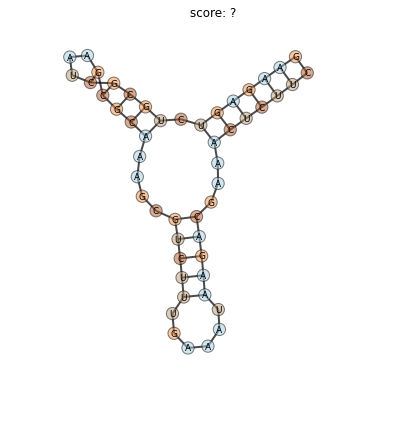

CPU times: user 23.2 s, sys: 2.48 s, total: 25.7 s
Wall time: 28.3 s


In [54]:
%%time
'''
Graph sampling
'''
%matplotlib inline

import graphlearn.utils.draw as myutils
import graphlearn.abstract_graphs.ubergraphlearn as ul
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import graphlearn.utils.draw as myutils
import eden.graph as ge

sampler=ul.UberSampler()
sampler.load('tmp/rna_ubergrammar.ge')
graphs = get_graphs()

id_start=15
id_end=id_start+6
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=10

graphs = sampler.sample(graphs,
                        n_samples=5,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        probabilistic_core_choice=False,
                        burnin=0,
                        select_cip_max_tries=10,
                        keep_duplicates=False)

from eden.modifier.graph.vertex_attributes import colorize   
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['A','U','G','C'])
    myutils.draw_graph_set(path_graphs,
                           n_graphs_per_line=6, size=7, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.7, node_size=150,
                          headlinehook= myutils.get_score_of_graph
                          )

In [50]:
#sampler.load('tmp/rna_ubergrammar.ge')
sampler.lsgg.productions[926815]

KeyError: 926815

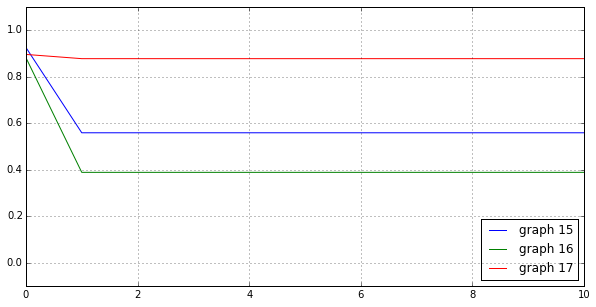

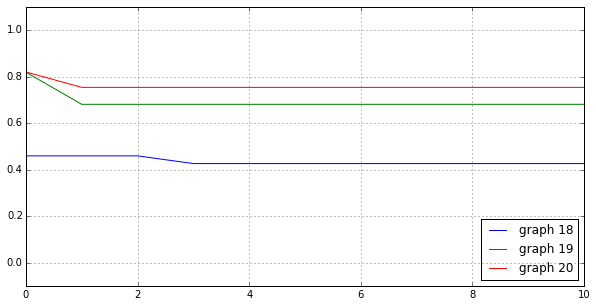

In [55]:
%matplotlib inline
from itertools import islice
import numpy as np

step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

In [ ]:
class X:
    def __init__(self,lol):
        self.lol=lol
        
x=X(5)

y=x.__class__(4)

y.lol


        